In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
from flask import Flask, render_template, request
 
import numpy as np
import os
 
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model

In [5]:
from tensorflow.keras.models import load_model
model = load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

In [6]:
filename="label_transform.pkl"
image_labels=pickle.load(open(filename,'rb'))

C:\Users\ANISHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
def pred(path_img):
    image_array=convert_image_to_array(path_img)
    np_image=np.array(image_array, dtype=np.float16)/225.0
    np_image=np.expand_dims(np_image,0)
    plt.imshow(plt.imread(path_img))
    result=np.argmax(model.predict(np_image), axis=-1)
#     result=model.predict_classes(np_img)
    print((image_labels.classes_[result][0]))

In [8]:
default_image_size = tuple((256, 256))
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

1/1 [==============================] - 0s 394ms/step
potato_healthy


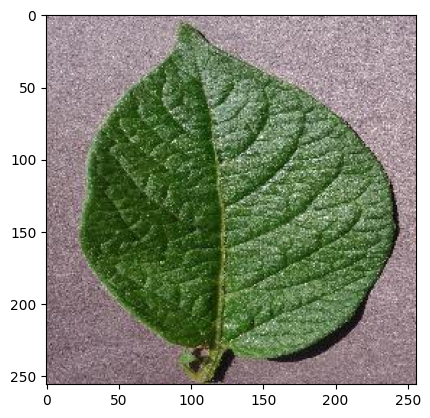

In [10]:
pred(r"C:\Users\ANISHA\Desktop\project\PlantVillage11\PlantVillage11\potato_healthy\2e0b8b4b-e900-408b-b760-730690bbd382___RS_HL 1901.JPG")

1/1 [==============================] - 0s 62ms/step
tomato_mosaiv_virus


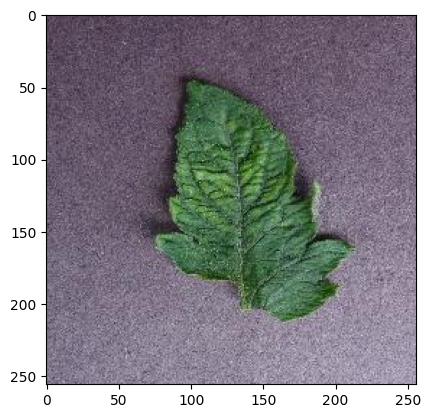

In [11]:
pred(r"C:\Users\ANISHA\Desktop\project\PlantVillage11\PlantVillage11\tomato_mosaiv_virus\0e56889c-7e80-49f3-8da3-3a437244e8fd___PSU_CG 2140.JPG")